# 1. Importing libraries

In [1]:
import numpy as np
import tarfile
import os
from PIL import Image
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


Ekstrak file tar

In [2]:
file_path = '../input/lfwpeople/lfw-funneled.tgz'

extracted_files = os.listdir('../working/')
print(extracted_files)
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../working/')

['__notebook__.ipynb']


# 2. Load Images and Labels

In [3]:
def load_images(folder, img_size=(100, 100)):
    images = []
    labels = []
    for person in os.listdir(folder):
        person_folder = os.path.join(folder, person)
        if os.path.isdir(person_folder):
            for img_name in os.listdir(person_folder):
                img_path = os.path.join(person_folder, img_name)
                if os.path.isfile(img_path):
                    img = Image.open(img_path).convert('L')  # Grayscale
                    img = img.resize(img_size)
                    images.append(np.array(img).flatten())
                    labels.append(person)
    return np.array(images), np.array(labels)

# 3. Load dataset

In [4]:
images, labels = load_images('/kaggle/working/lfw_funneled')
print(f"Loaded {images.shape[0]} images with {len(np.unique(labels))} unique labels.")

Loaded 13233 images with 5749 unique labels.


# 4. Encode Labels

In [5]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 5. Split Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# 6. Apply PCA for Feature Reduction

In [7]:
n_components = 150  # Number of principal components
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 7. Train SVM Classifier

In [8]:
svc = SVC(kernel='linear', class_weight='balanced', random_state=42)
svc.fit(X_train_pca, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

# 8. Evaluate the Model

In [9]:
y_pred = svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.11
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          20       0.40      0.33      0.36         6
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          52

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

# 9. Display Sample Predictions

In [10]:
def show_images_with_predictions(images, true_labels, pred_labels, label_encoder, n_samples=9):
    plt.figure(figsize=(12, 12))
    for i in range(n_samples):
        idx = np.random.randint(0, len(images))
        img = images[idx].reshape(100, 100)
        true_label = label_encoder.inverse_transform([true_labels[idx]])[0]
        pred_label = label_encoder.inverse_transform([pred_labels[idx]])[0]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# 10. Show predictions

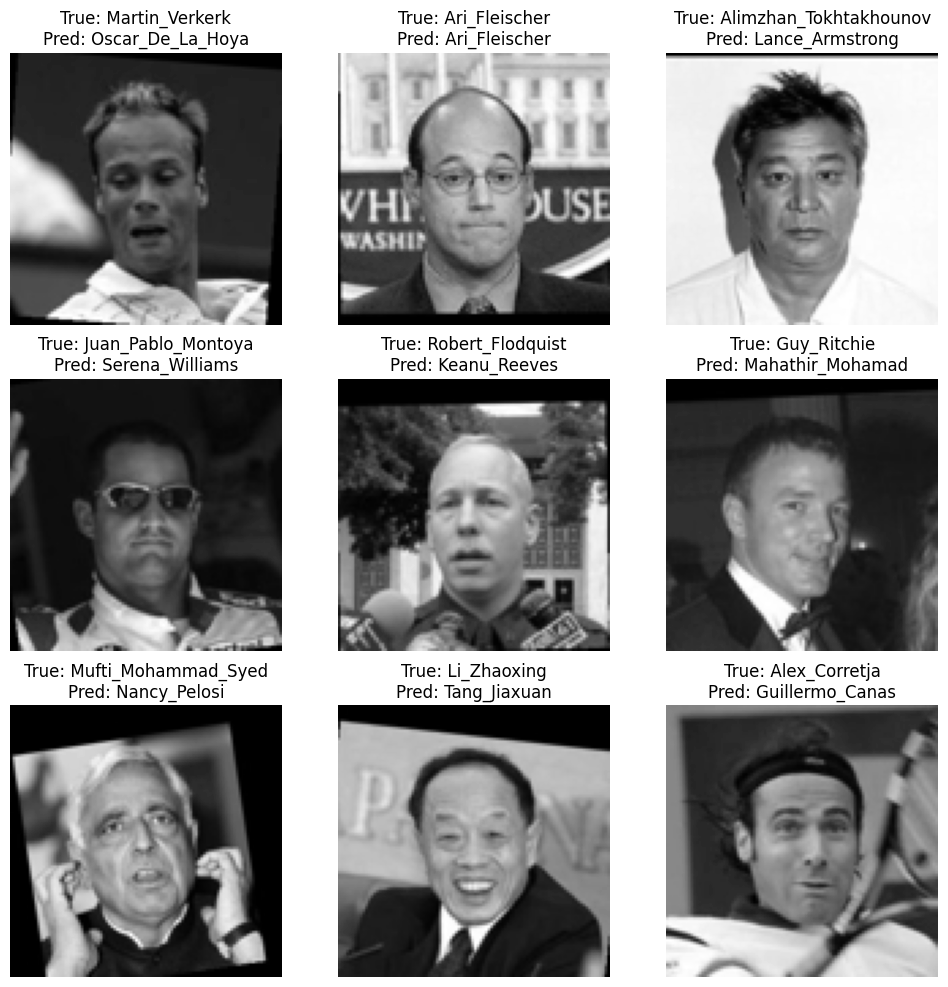

In [11]:
show_images_with_predictions(X_test, y_test, y_pred, label_encoder)